**Titanic Survival Challenge - Kaggle**
<br>In this challenge, we use tools of machine learning and data visualization to predict what sorts of people are likely to survive the tragedy.

**LOAD DATA**
<br>First let us import numpy and pandas which are used for data manipulation.

In [1]:
import pandas as pd
import numpy as np

Now lets load the train.csv file which contains data for training.

In [2]:
train = pd.read_csv('./input/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can see that Age has 177 null values, Cabin has 687 and Embarked has 2 null values

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**DATA VISUALIZATION**
<br>Lets import matplotlib and seaborn for data visualization

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

People between the age 20 to 40 have more chances of survival

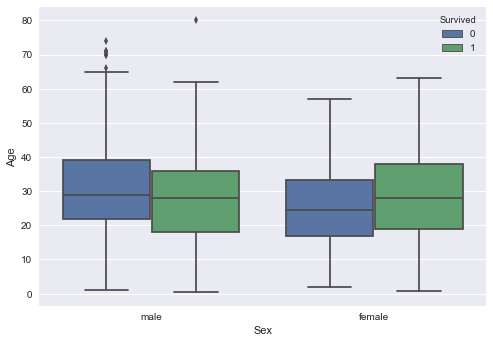

In [7]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=train)

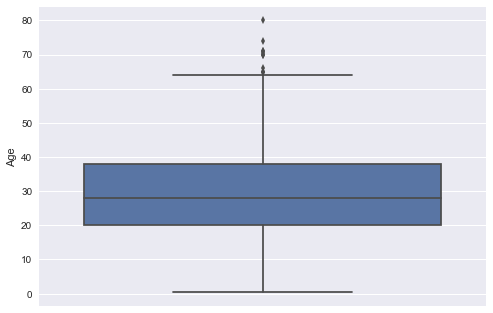

In [8]:
sns.boxplot(y='Age',hue='Survived',data=train)

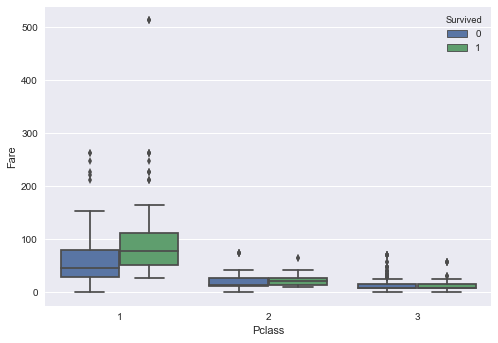

In [9]:
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=train)

Tickets of PClass=1 have more fare than other PClass. People with PClass=1 have more survival chances than the others.

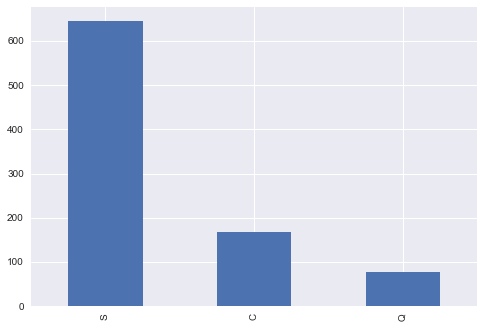

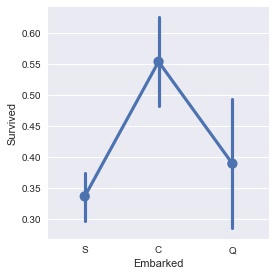

In [10]:
train['Embarked'].value_counts().plot(kind='bar')
sns.factorplot(x='Embarked', y='Survived', data=train)

Of all the embarked points, most of the people board from 'S'. However, people who used 'C' have more survival rates. 

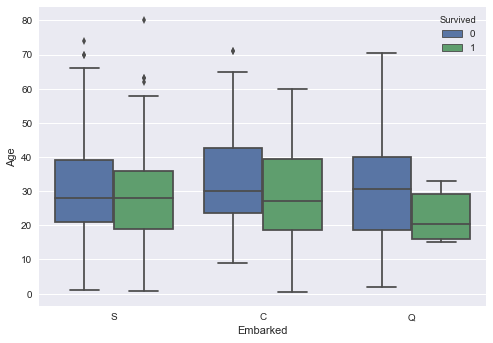

In [11]:
sns.boxplot(x='Embarked', y='Age', hue='Survived', data=train)

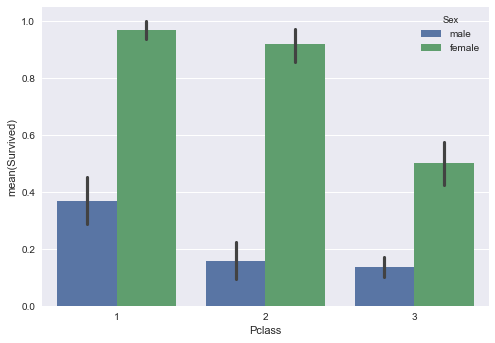

In [12]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)

Females who have tickets with PClass=1 have more survival probability.

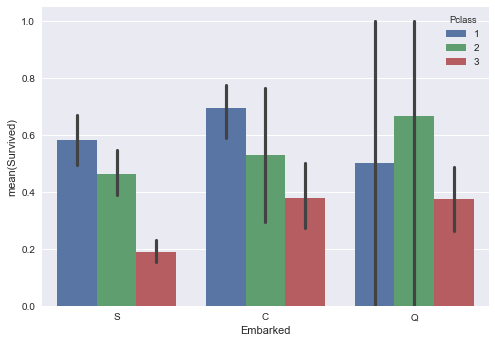

In [13]:
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train)

As already established above, people who used 'C' as embarked point and have PClass=1 ticket have a better shot at survival

In [14]:
train['Deck'] = train['Cabin'].str[0]

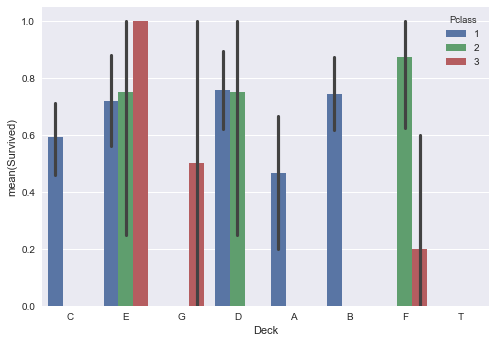

In [15]:
sns.barplot(x='Deck', y='Survived', hue='Pclass', data=train)

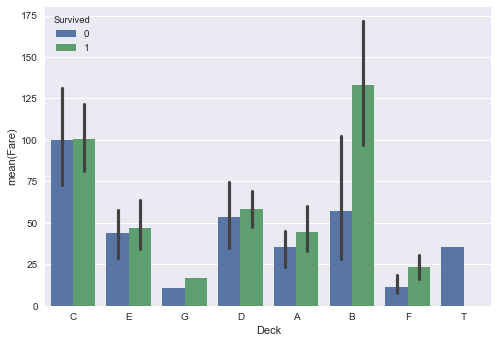

In [16]:
sns.barplot(x='Deck', y='Fare', hue='Survived', data=train)

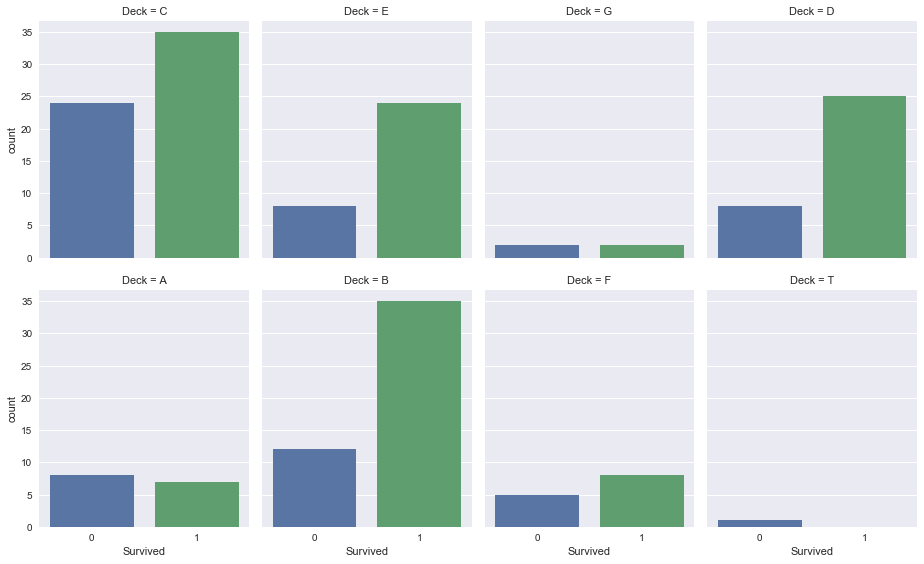

In [17]:
sns.factorplot(x='Survived', col='Deck', data=train, kind='count', col_wrap=4, aspect=0.8)

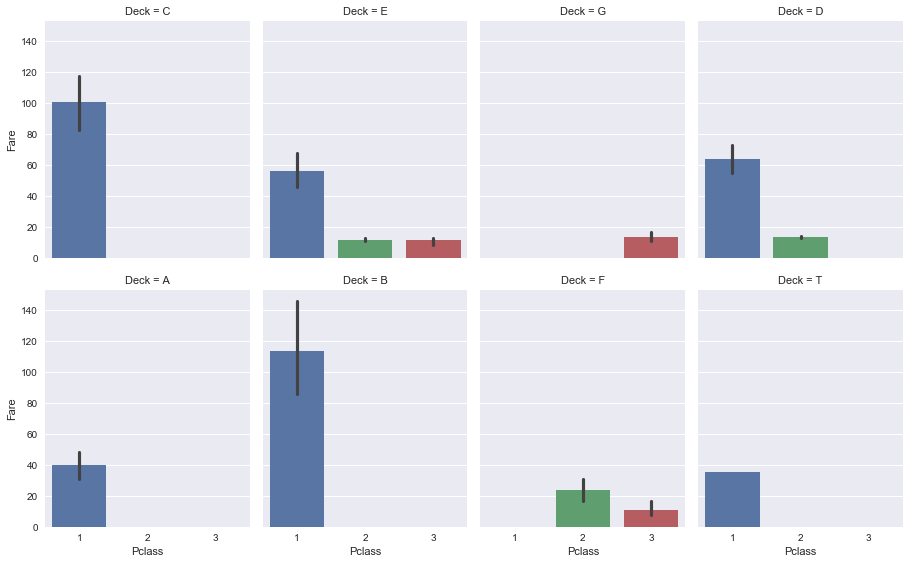

In [26]:
sns.factorplot(y='Fare', x='Pclass', col='Deck', data=train, kind='bar', col_wrap=4, aspect=0.8)

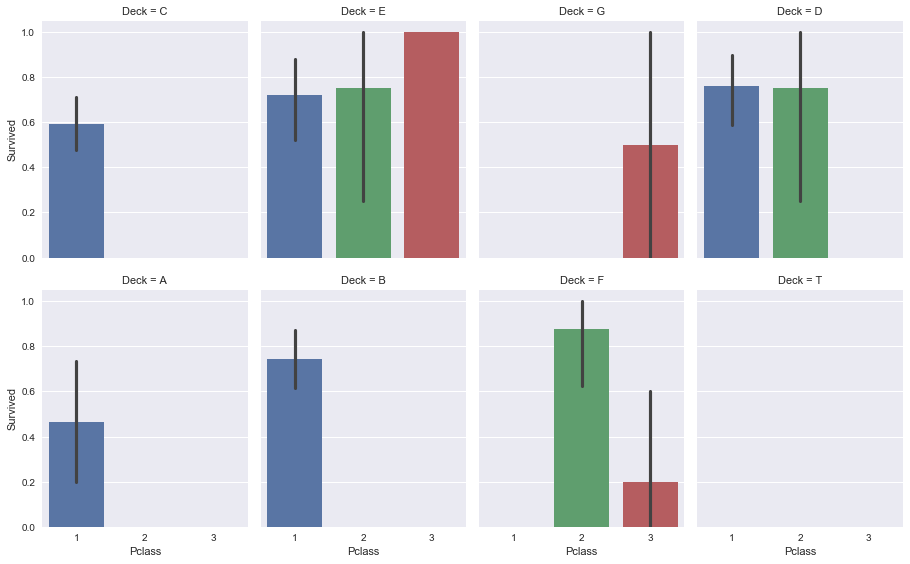

In [27]:
sns.factorplot(y='Survived', x='Pclass', col='Deck', data=train, kind='bar', col_wrap=4, aspect=0.8)

From the above graphs, it is clear that people on decks C and E having Pclass=1 tickets have highest chances of survival that the others

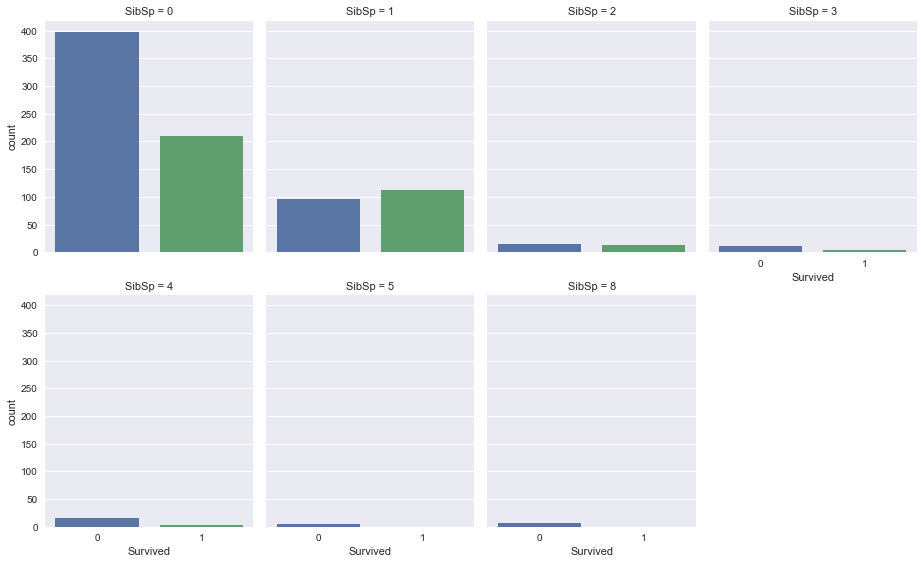

In [18]:
sns.factorplot(x='Survived', col='SibSp', data=train, kind='count', col_wrap=4, aspect=0.8)

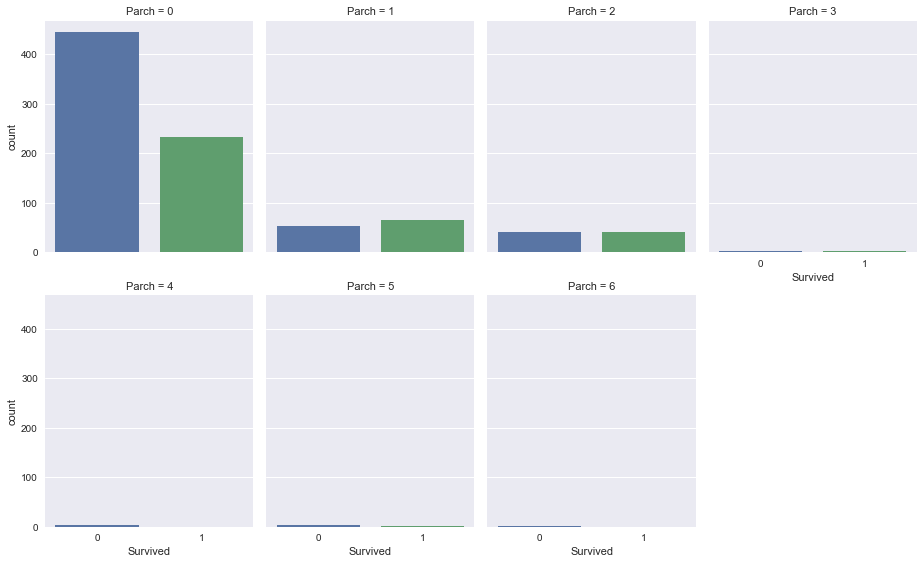

In [19]:
sns.factorplot(x='Survived', col='Parch', data=train, kind='count', col_wrap=4, aspect=0.8)

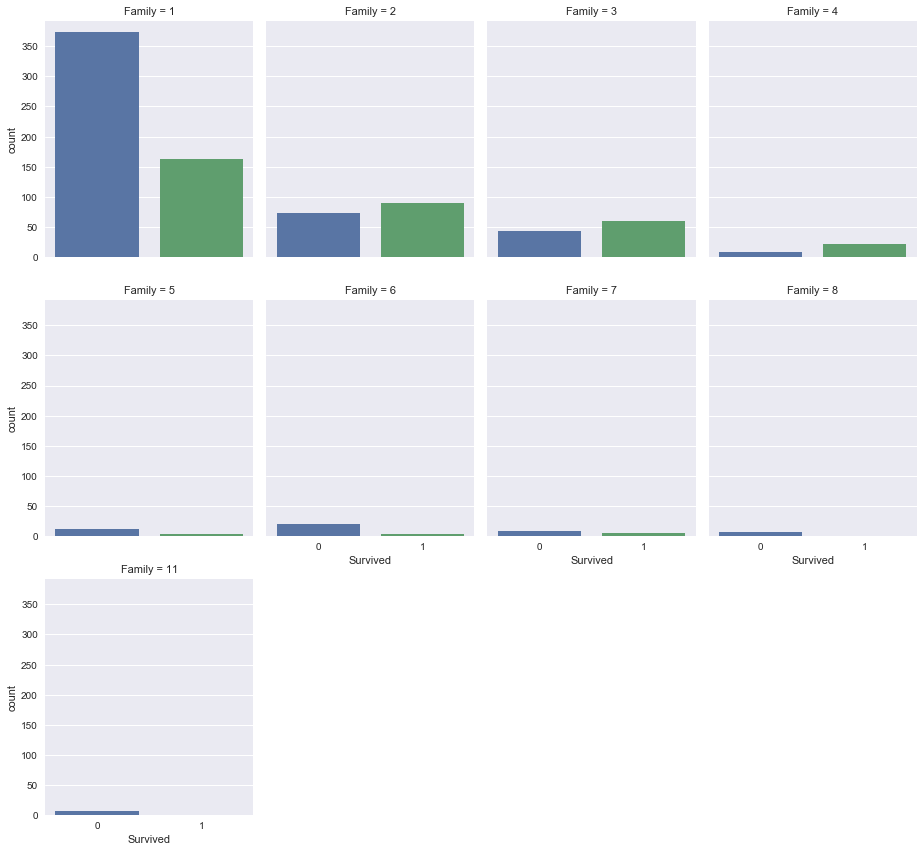

In [20]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
sns.factorplot(x='Survived', col='Family', data=train, kind='count', col_wrap=4, aspect=0.8)

In [21]:
train.loc[train['Family'] == 1, "Fsize"] = 'single'
train.loc[(train['Family'] > 1),'Fsize'] = 'family'
train.loc[(train['Age'] < 19),'Group'] = 'teens&younger'
train.loc[(train['Age'] > 19) & (train['Age'] < 55),'Group'] = 'adult'
train.loc[(train['Age'] > 55),'Group'] = 'old'

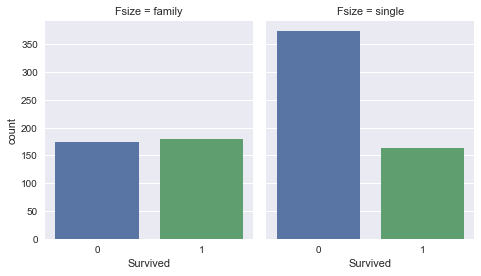

In [22]:
sns.factorplot(x='Survived', col='Fsize', data=train, kind='count', col_wrap=4, aspect=0.8)

Families have more chances of survival than single travellers. Also, the number of single travellers who did not survive is much larger than travellers with families

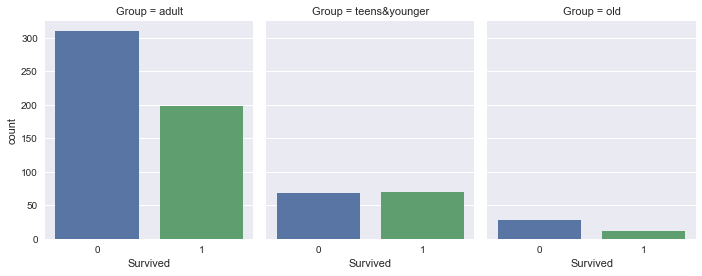

In [23]:
sns.factorplot(x='Survived', col='Group', data=train, kind='count', col_wrap=4, aspect=0.8)

Out of the different age groups of people on board, people between the age 19 and 55 have a better rate of survival than people in other age groups.